In [2]:
!apt-get update -y

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [3]:
!apt-get install -y python3.10-venv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10-venv is already the newest version (3.10.12-1~22.04.6).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.


In [4]:
!python3 -m venv data_science_env

In [5]:
!source data_science_env/bin/activate

In [6]:
!data_science_env/bin/pip install pandas numpy matplotlib scikit-learn seaborn plotly bokeh dash

In [7]:
!pip install -r requirements.txt

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Actualizar las bibliotecas de seaborn
!pip uninstall plotly -y
!pip install plotly


Found existing installation: plotly 5.3.1
Uninstalling plotly-5.3.1:
  Successfully uninstalled plotly-5.3.1
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import dash


In [14]:
import pandas as pd
url = "https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/refs/heads/master/data/retail-data/all/online-retail-dataset.csv?classId=cd0b6b9e-28f2-424f-9517-30a93a11d74a"

data = pd.read_csv(url, encoding ="latin1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64
            Quantity      UnitPrice     CustomerID
count  531285.000000  531285.000000  397924.000000
mean       10.655262       3.857296   15294.315171
std       156.830323      41.810047    1713.169877
min         1.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13969.000000
50%         3.000000       2.080000   15159.000000
75%        10.000000       4.130000   16795.000000
max     80995.000000   13541.330000   18287.000000


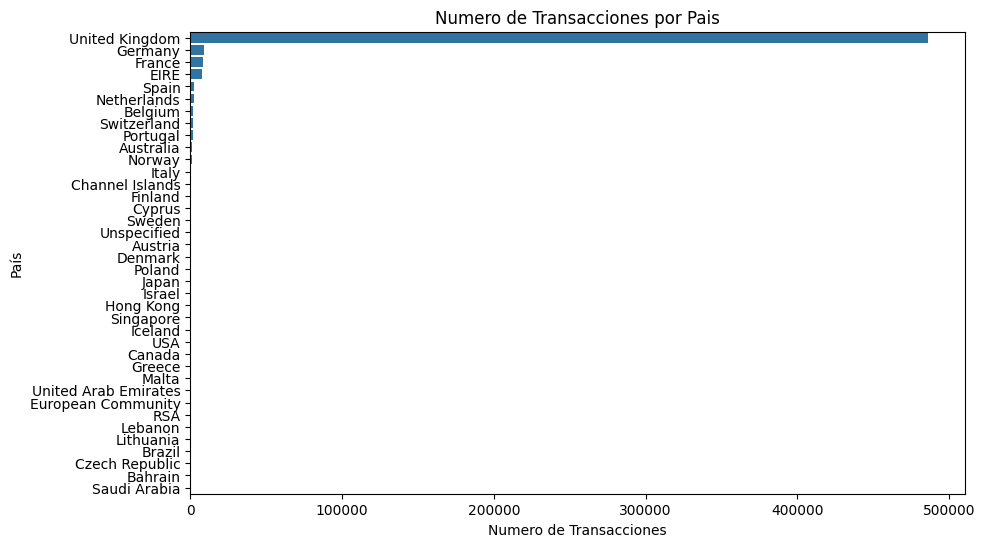

In [22]:
print(data.isnull().sum())
print(data.describe())
data = data[data["Quantity"]>0]
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure (figsize =(10 , 6))
sns.countplot(y='Country', data=data , order=data ['Country'].value_counts().index)
plt.title('Numero de Transacciones por Pais')
plt.xlabel('Numero de Transacciones')
plt.ylabel('País')
plt.show()

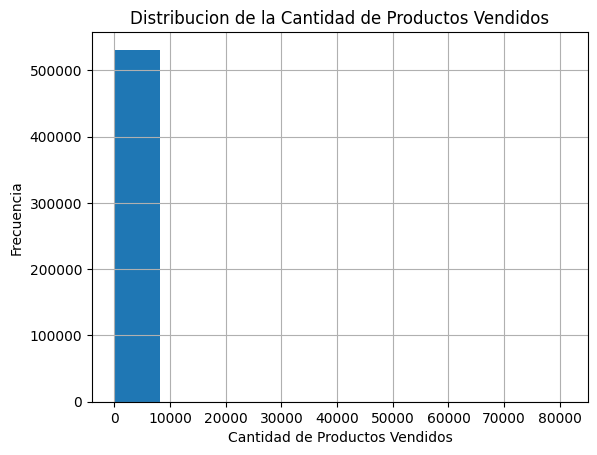

In [28]:
import matplotlib.pyplot as plt
# Histograma para la cantidad de ventas
data ["Quantity"].hist ()
plt.xlabel('Cantidad de Productos Vendidos')
plt.ylabel('Frecuencia')
plt.title ('Distribucion de la Cantidad de Productos Vendidos')
plt.show()


In [26]:
import plotly. express as px
fig = px.scatter(data , x="Quantity", y="UnitPrice", color="Country", title="Relacion entre Cantidad y Precio Unitario por Paıs")
fig.show()

In [29]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

p = figure ( title =" Cantidad de Productos Vendidos por Fecha ", x_axis_label =' Fecha ', y_axis_label='Cantidad')
data ['InvoiceDate'] = pd.to_datetime (data['InvoiceDate'])
sales_per_date = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum()
p.line( x= sales_per_date.index , y= sales_per_date.values , legend_label=" Ventas Diarias", line_width=2)
show(p)
